# โครงการอบรมเชิงปฏิบัติการภาษาไพทอนบนคลาวด์สำหรับการคำนวณเชิงตัวเลข

เรียบเรียง รองศาสตราจารย์ ดร. กรุง สินอภิรมย์สราญ  
วันที่ 15 กุมภาพันธ์ 2563 
เวลา 1.30 นาที 

อ้างอิง [https://www.oreilly.com/library/view/python-for-excel/9781492080992/ch04.html](https://www.oreilly.com/library/view/python-for-excel/9781492080992/ch04.html)

## ๑. บทนำโมดูล numpy

โมดูล `numpy` ถูกออกแบบมาเพื่อประมวลผลโปรแกรมแก้ปัญหาการคำนวณเชิงตัวเลข ของภาษาไพทอน โครงสร้างข้อมูลหลักที่ใช้ในโมดูล numpy คือ numpy.array ที่ออกแบบการบันทึกข้อมูลเหมือนภาษาซี เน้นประสิทธิภาพในการคำนวณ เวกเตอร์ เมทริกซ์ และข้อมูลแถวลำดับหลายมิิติ 

รหัสการประมวลผลภายในเขียนด้วยภาษาซีและภาษาฟอร์แทรนทำให้การคำนวณกระชับและรวดเร็ว

* ปกติการใช้ โมดูล `numpy` มักถูกย่อด้วย `np`  
* โมดูล numpy ประมวลผลบน numpy array (np.array)

**เหตุผลในการใช้ `numpy` array แทน Python list**

* Python list มีการจัดการทุกสมาชิกเป็นวัตถุ ทำให้สมาชิกใน python list ไม่จำเป็นต้องบันทึกข้อมูลชนิดเดียวกัน นอกจากนี้ Python list สนับสนุนการคูณหรือบวกสมาชิกทีละสมาชิก ไม่สามารถเขียนนิพจน์เหมือนกับเวกเตอร์ ได้โดยตรง
* np.array มีการบังคับสมาชิกทุกตัวเป็นชนิดเดียวกัน แบบ **statically typed** ชนิดของข้อมูลใน np.array ประกาศเมื่อเริ่มสร้าง
* np.array มีการบริหารจัดการหน่วยความจำในลักษณะเหมือนภาษาซี สามารถเรียกใช้ได้อย่างมีประสิทธิภาพ
* เนื่องจาก np.array เป็น statically typed ฟังก์ชันการคำนวณทางคณิตศาสตร์ถูกเขียนอย่างมีประสิทธิภาพ โดยเรียกรหัสโปรแกรมที่คอมไพล์ใน C หรือ Fortran

### โครงสร้างข้อมูล np.array

![Array Memory Layout](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/array_vs_list.png?raw=true)

### ชนิดของข้อมูลใน np.array

| ชนิดข้อมูล	    | คำอธิบาย (ภาษาอังกฤษ) |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

### ภาพของ np.array

ลักษณะของ np.array อาจมีหนึ่งมิติ (มีเฉพาะ axis=0) เรียกเวกเตอร์ หรือสองมิติ (มี axis=0 แทนแนวตั้งและ axis=1 แทนแนวนอน) เรียกเมทริกซ์
![Numpy array](https://www.oreilly.com/api/v2/epubs/9781492080992/files/assets/pyfe_0401.png)

ใช้ `.dtype` (data type) เพื่อแสดงชนิดของ np.array


In [2]:
# ใช้ matplotlib เพื่อแสดงกราฟใน jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.__version__

'1.21.6'

## ๒. การสร้าง numpy array

ในโมดูล `numpy` สนับสนุนการสร้าง `numpy` array หลากหลายรูปแบบ

1. สร้างจาก Python list หรือ Python tuple
2. เรียกใช้ฟังก์ชันที่ออกแบบมาเพื่อสร้าง `numpy` array โดยเฉพาะ เช่น `arange`, `linspace`
3. การอ่านจากไฟล์


### ๒.๑ การสร้างจากโครงสร้างข้อมูลของภาษา Python

In [3]:
# เวกเตอร์ สร้างจาก Python list หนึ่งมิติ
v = np.array([3, 2, -1]); print(v)
# เมทริซ์ สร้างจาก Python list ซ้อนสองชั้น
M = np.array([[0, 1, 2], [3, 4, 5]]); print(M)
# แถวอันดับ หลายมิติ ซ้อนสามชั้น
R = np.array([[[1, 2], [2, 3]], [[-1, 0], [1, 2]]]); print(R)

[ 3  2 -1]
[[0 1 2]
 [3 4 5]]
[[[ 1  2]
  [ 2  3]]

 [[-1  0]
  [ 1  2]]]


ผู้เขียนสามารถเรียกฟังก์ชัน `np.shape` และ `np.size` ในการแสดงมิติและจำนวนสมาชิกใน `numpy` array

In [4]:
# เวกเตอร์ v
print(v)
print(type(v))
print(v.dtype)
print(v.shape, np.shape(v))
print(v.size, np.size(v))

[ 3  2 -1]
<class 'numpy.ndarray'>
int64
(3,) (3,)
3 3


In [5]:
# เมทริกซ์ M
print(M)
print(type(M))
print(M.dtype)
print(M.shape, np.shape(M))
print(M.size, np.size(M))

[[0 1 2]
 [3 4 5]]
<class 'numpy.ndarray'>
int64
(2, 3) (2, 3)
6 6


In [6]:
# แถวอันดับ R
print(R)
print(type(R))
print(R.dtype)
print(R.shape, np.shape(R))
print(R.size, np.size(R))

[[[ 1  2]
  [ 2  3]]

 [[-1  0]
  [ 1  2]]]
<class 'numpy.ndarray'>
int64
(2, 2, 2) (2, 2, 2)
8 8


### ๒.๒ การสร้างจากฟังก์ชันในโมดูล numpy

1. ฟังก์ชัน np.arange() สร้างเวกเตอร์ของดัชนี คล้ายฟังก์ชัน range() ของภาษาไพทอน
2. ฟังก์ชัน np.linspace() สร้างเวกเดอร์ของจำนวนที่มีระยะห่างเท่ากัน หรือ np.logspace()
3. ฟังก์ชัน np.mgrid[] สร้างเมทริกซ์ของกริดที่ส่งข้อมูลเมทริกซ์สองตัว โดยที่แถวแรกเริ่มจากดัชนี 0 ทั้งหมดแล้วเพิ่มทีละหนึ่งของทุกตัวในแถว
4. ฟังก์ชัน np.random.randn() สร้างแถวลำดับอย่างสุ่ม
5. ฟังก์ชัน np.zeros(), np.ones() สร้างแถวลำดับที่มีค่าสมาชิกเป็นศูนย์ หรือหนึ่งทั้งหมด

In [7]:
# สร้าง `numpy` array เป็นดัชนี
np.random.seed(1)
x10 = np.arange(0, 10, 1); print(x10) # อาร์กิวเมนต์ เริ่ม หยุด และเพิ่มทีละหนึ่งค่า
x200 = np.arange(-1, 1, 0.1); print(x200) 
x21  = np.linspace(0, 5, 21); print(x21)
xlog10 = np.logspace(0, 10, 10, base=np.e); print(xlog10)
xcor, ycor = np.mgrid[0:3, 0:3]; print(xcor, ycor)
xr33 = np.random.rand(3,3); print(xr33)
z23 = np.zeros((2,3)); print(z23)
o23 = np.ones((2,3)); print(o23)

[0 1 2 3 4 5 6 7 8 9]
[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]
[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25
 3.5  3.75 4.   4.25 4.5  4.75 5.  ]
[1.00000000e+00 3.03773178e+00 9.22781435e+00 2.80316249e+01
 8.51525577e+01 2.58670631e+02 7.85771994e+02 2.38696456e+03
 7.25095809e+03 2.20264658e+04]
[[0 0 0]
 [1 1 1]
 [2 2 2]] [[0 1 2]
 [0 1 2]
 [0 1 2]]
[[4.17022005e-01 7.20324493e-01 1.14374817e-04]
 [3.02332573e-01 1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01 3.96767474e-01]]
[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]


### ๒.๓ การสร้าง numpy array จากไฟล์ข้อมูล

1. ใช้ฟังก์ชัน np.genfromtxt(\<filename\>, \<options\>) เพื่ออ่านข้อมูลจากไฟล์ \<filename\> สกุล csv (comma separated value) หรือ tsv (tabbed separated value) ใช้ฟังก์ชัน np.savetxt(\<filename\>, \<np.array\>) เพื่อบันทึกข้อมูล \<np.array\> เป็น text file ในชื่อ \<filename\>
2. ผู้เขียนสามารถเรียก np.array จากไฟล์ที่บันทึกไว้ด้วย np.save(\<filename\>, \<np.array\>) ด้วย np.load(\<filename\>)

In [8]:
!wget https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/president_heights.csv

--2023-02-14 07:34:44--  https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/president_heights.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 988 [text/plain]
Saving to: ‘president_heights.csv’

president_heights.c 100%[===================>]     988  --.-KB/s    in 0s      

2023-02-14 07:34:44 (24.6 MB/s) - ‘president_heights.csv’ saved [988/988]



In [9]:
!head president_heights.csv

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189
4,James Madison,163
5,James Monroe,183
6,John Quincy Adams,171
7,Andrew Jackson,185
8,Martin Van Buren,168
9,William Henry Harrison,173


In [10]:
presidentHeight = np.genfromtxt('president_heights.csv', delimiter=',', skip_header=1); print(presidentHeight)

[[  1.  nan 189.]
 [  2.  nan 170.]
 [  3.  nan 189.]
 [  4.  nan 163.]
 [  5.  nan 183.]
 [  6.  nan 171.]
 [  7.  nan 185.]
 [  8.  nan 168.]
 [  9.  nan 173.]
 [ 10.  nan 183.]
 [ 11.  nan 173.]
 [ 12.  nan 173.]
 [ 13.  nan 175.]
 [ 14.  nan 178.]
 [ 15.  nan 183.]
 [ 16.  nan 193.]
 [ 17.  nan 178.]
 [ 18.  nan 173.]
 [ 19.  nan 174.]
 [ 20.  nan 183.]
 [ 21.  nan 183.]
 [ 23.  nan 168.]
 [ 25.  nan 170.]
 [ 26.  nan 178.]
 [ 27.  nan 182.]
 [ 28.  nan 180.]
 [ 29.  nan 183.]
 [ 30.  nan 178.]
 [ 31.  nan 182.]
 [ 32.  nan 188.]
 [ 33.  nan 175.]
 [ 34.  nan 179.]
 [ 35.  nan 183.]
 [ 36.  nan 193.]
 [ 37.  nan 182.]
 [ 38.  nan 183.]
 [ 39.  nan 177.]
 [ 40.  nan 185.]
 [ 41.  nan 188.]
 [ 42.  nan 188.]
 [ 43.  nan 182.]
 [ 44.  nan 185.]]


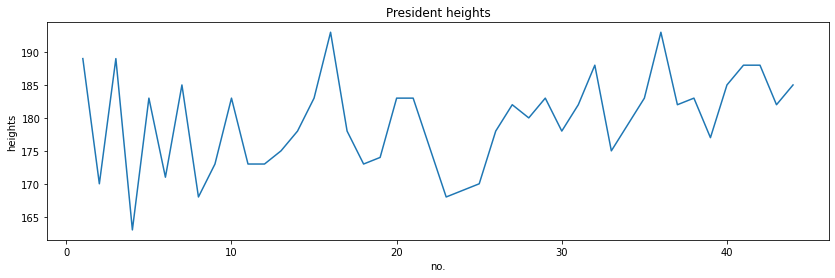

In [11]:
fig, ax = plt.subplots(figsize=(14,4))
ax.plot(presidentHeight[:,0], presidentHeight[:,2])
ax.axis('tight')
ax.set_title('President heights')
ax.set_xlabel('no.')
ax.set_ylabel('heights');

In [12]:
# ตรวจสอบ np.array
PH = presidentHeight[:,2]
print(type(PH))
print(PH.dtype)
print(PH.shape)
print(PH.size)

<class 'numpy.ndarray'>
float64
(42,)
42


In [13]:
np.savetxt("presidentHeight.txt", presidentHeight)

In [14]:
!cat presidentHeight.txt

1.000000000000000000e+00 nan 1.890000000000000000e+02
2.000000000000000000e+00 nan 1.700000000000000000e+02
3.000000000000000000e+00 nan 1.890000000000000000e+02
4.000000000000000000e+00 nan 1.630000000000000000e+02
5.000000000000000000e+00 nan 1.830000000000000000e+02
6.000000000000000000e+00 nan 1.710000000000000000e+02
7.000000000000000000e+00 nan 1.850000000000000000e+02
8.000000000000000000e+00 nan 1.680000000000000000e+02
9.000000000000000000e+00 nan 1.730000000000000000e+02
1.000000000000000000e+01 nan 1.830000000000000000e+02
1.100000000000000000e+01 nan 1.730000000000000000e+02
1.200000000000000000e+01 nan 1.730000000000000000e+02
1.300000000000000000e+01 nan 1.750000000000000000e+02
1.400000000000000000e+01 nan 1.780000000000000000e+02
1.500000000000000000e+01 nan 1.830000000000000000e+02
1.600000000000000000e+01 nan 1.930000000000000000e+02
1.700000000000000000e+01 nan 1.780000000000000000e+02
1.800000000000000000e+01 nan 1.730000000000000000e+02
1.900000000000000000e+01 nan

In [15]:
# การบันทึกและการอ่านกลับ
np.save("ph.npy", presidentHeight)

In [16]:
!ls # แสดงรายการไฟล์และไดเร็กทอรีปัจจุบัน

ph.npy	president_heights.csv  presidentHeight.txt  sample_data


In [17]:
x = np.load("ph.npy"); print(x)

[[  1.  nan 189.]
 [  2.  nan 170.]
 [  3.  nan 189.]
 [  4.  nan 163.]
 [  5.  nan 183.]
 [  6.  nan 171.]
 [  7.  nan 185.]
 [  8.  nan 168.]
 [  9.  nan 173.]
 [ 10.  nan 183.]
 [ 11.  nan 173.]
 [ 12.  nan 173.]
 [ 13.  nan 175.]
 [ 14.  nan 178.]
 [ 15.  nan 183.]
 [ 16.  nan 193.]
 [ 17.  nan 178.]
 [ 18.  nan 173.]
 [ 19.  nan 174.]
 [ 20.  nan 183.]
 [ 21.  nan 183.]
 [ 23.  nan 168.]
 [ 25.  nan 170.]
 [ 26.  nan 178.]
 [ 27.  nan 182.]
 [ 28.  nan 180.]
 [ 29.  nan 183.]
 [ 30.  nan 178.]
 [ 31.  nan 182.]
 [ 32.  nan 188.]
 [ 33.  nan 175.]
 [ 34.  nan 179.]
 [ 35.  nan 183.]
 [ 36.  nan 193.]
 [ 37.  nan 182.]
 [ 38.  nan 183.]
 [ 39.  nan 177.]
 [ 40.  nan 185.]
 [ 41.  nan 188.]
 [ 42.  nan 188.]
 [ 43.  nan 182.]
 [ 44.  nan 185.]]


## ๓. การอ้างถึงสมาชิกใน numpy array

ในการปรับเปลี่ยนข้อมูลในตัวแปรโปรแกรม `numpy` array ผู้พัฒนาต้องมีวิธีการอ้างถึงสมาชิกจากตัวแปร


### ๓.๑ การอ้างถึงสมาชิกด้วยดัชนีที่มีค่าเป็นจำนวนเต็ม

การอ้างถึงสมาชิกใน `numpy` array โดยใช้ [ ] พร้อมค่าดัชนีที่มีค่าเป็นจำนวนเต็ม

* a[0] อ้างถึงสมาชิกตัวแรกใน เวกเตอร์ a
* M[0, 0] อ้างถึงสมาชิกที่มุมบนซ้ายสุดของเมทริกซ์ M
* `:` แทนสมาชิกทั้งแถว หรือทั้งหลัก
* `lower:upper:step` แทนการเลือกเฉพาะบางสมาชิกแบบ (slice) เริ่มจากดัชนี lower ถึงดัชนี upper-1 โดยเพิ่มทีละ step
* M[mask] แทนการเลือกสมาชิกตามตำแหน่งของ maske ที่มีสมาชิกเป็น bool (มีค่าเป็น True = เลือก หรือ False = ไม่เลือก)  
* M[M > 1] แทนการเลือกสมาชิกตามเงื่อนไขที่ค่าดังกล่าวเกิน 1



In [18]:
# การอ้างถึงสมาชิก
print(x10[5]) # เลือกตัวที่หกจากเวกเตอร์ x10
print(xr33[0, 2]) # เลือกตัวแรก ณ แถวที่ 1 หลักที่ 2
print(xr33[:, 2]) # เลือกทุกแถวในหลักที่ 2
print(xr33[::-1,2]) # เลือกทุกแถวในหลักที่ 2 เรียงจากลำดับสุดท้าย
print(x10[[True, False, False, True, True, False, False, True, True, True]]) # เลือกเฉพาะที่ปรากฎสมาชิกเป็น True
print(x10[x10>5]) # เลือกเฉพาะตัวที่มีค่ามากกว่า 5

5
0.00011437481734488664
[1.14374817e-04 9.23385948e-02 3.96767474e-01]
[3.96767474e-01 9.23385948e-02 1.14374817e-04]
[0 3 4 7 8 9]
[6 7 8 9]


In [19]:
print(M.itemsize) # จำนวนสมาชิกทั้งหมดใน M
print(M.nbytes)   # จำนวนไบต์ทั้งหมดใน M
print(M.ndim)     # จำนวนมิติของ M

8
48
2


### ๓.๒ การปรับค่าใน np.array

สำหรับ np.array วัตถุที่ชื้จะเป็น view กล่าวคือ ณ เวลาที่สร้างกำหนดตัวแปรดังกล่าววัตถุจะชี้ไปที่หน่วยความจำที่กำหนด การใช้ = จะเป็นการสร้าง view ทำให้การแก้ไขที่ผลลัพธ์จะกระทบกับค่าเริ่มต้น


In [20]:
# การปรับค่าใน np.array
x = np.arange(5); print(x)    # สร้างเวกเตอร์ของดัชนีจาก 0 ถึง 4
subx = x[::2]                 # สร้าง view บน x ที่อ้างถึงดัชนีคู่
subx[1] = -10                 # มีการเปลี่ยนค่าใน subx ตัวที่สอง
print(subx); print(x)         # ผลลัพธ์กระทบกับ x
newx = np.where(x<2, 2*x, -x) # ถ้าค่าของ x น้อยกว่า 2 ในดับเบิ้ลค่า มิฉะนั้นให้เป็นค่าติดลบ
print(newx)
np.where(newx >= 0)               # ส่งค่าดัชนีที่สอดคล้องกับเงื่อนไขที่กำหนดให้

[0 1 2 3 4]
[  0 -10   4]
[  0   1 -10   3   4]
[  0   2 -20  -3  -4]


(array([0, 1]),)

In [21]:
print(x10[[True, False, False, True, True, False, False, True, True, True]]) # เลือกเฉพาะที่ปรากฎสมาชิกเป็น True
print(x10[x10>5]) # เลือกเฉพาะตัวที่มีค่ามากกว่า 5


[0 3 4 7 8 9]
[6 7 8 9]


In [22]:
print(M)
print(np.diag(M))
print(np.diag(M, -1))

[[0 1 2]
 [3 4 5]]
[0 4]
[3]


In [23]:
print(x10)
which = [1, 0, 0, 1, 1, 0, 1, 1, 0, 1]
choices = [np.ones(10), 2*np.ones(10)]
print(np.choose(which, choices))

[0 1 2 3 4 5 6 7 8 9]
[2. 1. 1. 2. 2. 1. 2. 2. 1. 2.]


### ๓.๓. การใช้ newaxis

อาร์กิวเมนต์ `np.newaxis` จะเพิ่มมิติของอาร์เรย์ใน numpy หรือเปลี่ยนเวกเตอร์แถว เป็นเวกเตอร์หลัก

In [24]:
rowvector = np.arange(4)
print(rowvector.shape, rowvector)
colmatrix = rowvector[:, np.newaxis]
print(colmatrix.shape, colmatrix)
rowmatrix = rowvector[np.newaxis, :]
print(rowmatrix.shape, rowmatrix)

(4,) [0 1 2 3]
(4, 1) [[0]
 [1]
 [2]
 [3]]
(1, 4) [[0 1 2 3]]


### ๓.๔. การซ้อน np.array

ฟังก์ชัน `np.repeat()`, `np.tile()`, `np.vstack()`, `np.hstack()`, และ `np.concatenate()` ปรับเปลี่ยนอาร์เรย์ ให้มีขนาดใหญ่ขึ้น


In [25]:
A = np.array([[1, 2], [3, 4]]); print(A)
A3 = np.repeat(A, 3); print(A3)
Atile3 = np.tile(A, 3); print(Atile3)

[[1 2]
 [3 4]]
[1 1 1 2 2 2 3 3 3 4 4 4]
[[1 2 1 2 1 2]
 [3 4 3 4 3 4]]


In [26]:
B = np.array([[5, 6]]); print(B)
AB = np.concatenate((A, B), axis=0); print(AB)
ABT = np.concatenate((A, B.T), axis=1); print(ABT)
ABvStack = np.vstack((A, B)); print(ABvStack)
ABhStack = np.hstack((A, B.T)); print(ABhStack)


[[5 6]]
[[1 2]
 [3 4]
 [5 6]]
[[1 2 5]
 [3 4 6]]
[[1 2]
 [3 4]
 [5 6]]
[[1 2 5]
 [3 4 6]]


In [27]:
for row_idx, row in enumerate(A):
  print('Row index:', row_idx, " row value:", row)
  for col_idx, ele in enumerate(row):
    print('Column index:', col_idx, " element:", ele)
    A[row_idx, col_idx] = ele**2
print(A)

Row index: 0  row value: [1 2]
Column index: 0  element: 1
Column index: 1  element: 2
Row index: 1  row value: [3 4]
Column index: 0  element: 3
Column index: 1  element: 4
[[ 1  4]
 [ 9 16]]


## ๔. การใช้ ufuncs

โมดูล numpy ในภาษาไพทอนมีการบันทึกข้อมูลในหน่วยความจำที่ติดกันทำให้การประมวลผลมีประสิทธิภาพ ผ่านการคำนวณแบบเวกเตอร์ (Vectorized operation) เรียกว่า universal function (ufuncs) ที่ไม่ต้องมีการวนซ้ำของสมาชิกใน np.array

### ๔.๑ การเปรียบเทียบเวลาระหว่างการใช้และไม่ใช้ ufuncs

In [28]:
np.random.seed(1) # รับประกันในการเรียกทุกครั้งจะได้เลขสุ่มเหมือนเดิม
def reciprocals(L):
    result = np.empty(len(L))
    for i in range(len(L)):
        result[i] = 1.0 / L[i]
    return result

In [29]:
big_list = np.random.randint(1, 100, size=500000)
%timeit reciprocals(big_list)

1.11 s ± 131 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [30]:
%timeit 1/big_list

807 µs ± 5.93 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


ตัวดำเนินทั้งหมดในโมดูล numpy ถูกเขียนมาในรูปแบบเวกเตอร์ดำเนินการ ufuncs 

In [31]:
x = np.arange(5)
print("x     =", x)
print("x + 2 =", x + 2)
print("x - 3 =", x - 3)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  

x     = [0 1 2 3 4]
x + 2 = [2 3 4 5 6]
x - 3 = [-3 -2 -1  0  1]
x * 2 = [0 2 4 6 8]
x / 2 = [0.  0.5 1.  1.5 2. ]
x // 2 = [0 0 1 1 2]


In [32]:
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

-x     =  [ 0 -1 -2 -3 -4]
x ** 2 =  [ 0  1  4  9 16]
x % 2  =  [0 1 0 1 0]


| ตัวดำเนินการ	    | ฟังก์ชัน np ที่สมมูลด้วย    | คำอธิบาย                              |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           | การบวก (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      | การลบ (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      | ค่าลบ (e.g., ``-2``)          |
|``*``          |``np.multiply``      | การคูณ (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        | การหาร (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  | การหารเอาส่วน (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         | การยกกำลัง (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           | การหารเอาเศษ (e.g., ``9 % 4 = 1``)|

### ๔.๒ ฟังก์ชันทางวิทยาศาสตร์ในโมดูล numpy

โมดูล numpy มีฟังก์ชันตรีโกณและตรีโกณผกผัน ฟังก์ชันเลขชี้กำลังและลอการิทึม

In [33]:
theta = np.linspace(0, np.pi, 4)
print("theta ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

theta  [0.         1.04719755 2.0943951  3.14159265]
sin(theta) =  [0.00000000e+00 8.66025404e-01 8.66025404e-01 1.22464680e-16]
cos(theta) =  [ 1.   0.5 -0.5 -1. ]
tan(theta) =  [ 0.00000000e+00  1.73205081e+00 -1.73205081e+00 -1.22464680e-16]
x         =  [-1, 0, 1]
arcsin(x) =  [-1.57079633  0.          1.57079633]
arccos(x) =  [3.14159265 1.57079633 0.        ]
arctan(x) =  [-0.78539816  0.          0.78539816]


In [34]:
x = [0, 1, 2]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x     = [0, 1, 2]
e^x   = [1.         2.71828183 7.3890561 ]
2^x   = [1. 2. 4.]
3^x   = [1 3 9]
x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


### ๔.๓ การบันทึกผลลัพธ์ลง np.array

นอกจากนี้ ฟังก์ชันใน numpy ยังสามารถเขียนผลลัพธ์ลง ณ ตำแหน่งของอาร์เรย์ที่ต้องการ


In [35]:
x = np.arange(4)
y = np.empty(4)
np.multiply(x, 3, out=y); print(y)
z = np.zeros(8)
np.power(2, x, out=z[::2]); print(z)

[0. 3. 6. 9.]
[1. 0. 2. 0. 4. 0. 8. 0.]


### ๔.๔ การใช้ฟังก์ชัน aggregate

- np.add/np.multiply ใช้ร่วมกับ reduce เพื่อบวกรวม
- np.sum() บวกรวม

In [37]:
x = np.arange(10)
print(np.add.reduce(x))
x = x + 1
print(np.multiply.reduce(x))
print(np.add.accumulate(x))

45
3628800
[ 1  3  6 10 15 21 28 36 45 55]


In [38]:
big_list = np.random.rand(1000000)
%timeit sum(big_list)
%timeit np.sum(big_list)

99 ms ± 30.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
484 µs ± 150 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
%timeit min(big_list)
%timeit np.min(big_list)

68.3 ms ± 13.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
455 µs ± 25.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [40]:
%timeit max(big_list)
%timeit np.max(big_list)

83.6 ms ± 28.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
435 µs ± 4.45 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [41]:
%timeit big_list.min()
%timeit big_list.max()

443 µs ± 37.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
428 µs ± 7.73 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [42]:
M = np.random.random((4, 5))
print(M)
print(M.sum())
print(M.min(axis=0))
print(M.max(axis=1))

[[0.06323148 0.14869032 0.68018179 0.41122845 0.86506522]
 [0.88488078 0.93162439 0.44566489 0.55130629 0.11799737]
 [0.34404181 0.40694276 0.19539797 0.59663716 0.83664328]
 [0.55461618 0.74592561 0.40658837 0.03832431 0.10979998]]
9.334788412651491
[0.06323148 0.14869032 0.19539797 0.03832431 0.10979998]
[0.86506522 0.93162439 0.83664328 0.74592561]


### ๔.๕ โมดูล numpy สำหรับค่าที่หายไป

ฟังก์ชันใน numpy อาจพบปัญหาของค่าที่ขาดหายไป ทำให้การคำนวณได้ค่าเป็น nan

| ชื่อฟังก์ชัน           |   เวอร์ชัน NaN-safe   | คำอธิบาย                              |
|-------------------|---------------------|-------------------------------------|
| ``np.sum``        | ``np.nansum``       | คำนวณผลรวมของอาร์เรย์                   |
| ``np.prod``       | ``np.nanprod``      | คำนวณผลคูณของอาร์เรย์                   |
| ``np.mean``       | ``np.nanmean``      | คำนวณค่าเฉลี่ยของอาร์เรย์                  |
| ``np.std``        | ``np.nanstd``       | คำนวณส่วนเบี่ยงเบนมาตรฐานของอาร์เรย์        |
| ``np.var``        | ``np.nanvar``       | คำนวณค่าความแปรปรวนของอาร์เรย์            |
| ``np.min``        | ``np.nanmin``       | คำนวณค่าต่ำสุดของอาร์เรย์                  |
| ``np.max``        | ``np.nanmax``       | คำนวณค่าต่ำสุดของอาร์เรย์                  |
| ``np.argmin``     | ``np.nanargmin``    | หาตำแหน่งต่ำสุดของอาร์เรย์                 |
| ``np.argmax``     | ``np.nanargmax``    | หาตำแหน่งสูงสุดของอาร์เรย์                 |
| ``np.median``     | ``np.nanmedian``    | คำนวณค่ามัธยฐานของอาร์เรย์                |
| ``np.percentile`` | ``np.nanpercentile``| คำนวณค่าลำดับสถิติของอาร์เรย์               |
| ``np.any``        | N/A                 | สรุปว่ามีบางสมาชิกในอาร์เรย์เป็นจริง            |
| ``np.all``        | N/A                 | สรุปว่าทุกสมาชิกในอาร์เรย์เป็นจริงทั้งหมด        |


In [43]:
v = np.array([3, 2, np.nan, 0, -1])
print(v)
print(v.sum())
print(np.nansum(v))

[ 3.  2. nan  0. -1.]
nan
4.0


## ๕. โมดูล numpy กับพีชคณิตเชิงเส้น

โมดูล numpy ถูกออกแบบมาให้ประมวลผลกับข้อมูลอาร์เรย์อย่างมีประสิทธิภาพ โดยผู้พัฒนาเขียนโปรแกรมในรูปแบบของ Vectorization ทางคณิตศาสตร์มีสาขาที่ศึกษาเกี่ยวกับการประมวลผลของอาร์เรย์ในหนึ่งมิติที่เรียก เวกเตอร์ อาร์เรย์ในสองมิติที่เรียก เมทริกซ์

เทอมที่ใช้คือ ตัวดำเนินการสเกลาร์ เวกเตอร์ หรือเมทริกซ์

### ๕.๑ การคำนวณแบบ scalar-array operations

สำหรับตัวดำเนินการระหว่างอาร์เรย์ กับสเกลาร์ ผู้เขียนสามารถเขียนตัวดำเนินการเหมือนการคำนวณปกติ แต่ผลลัพธ์จะได้จากการนำสเกลาร์ไปดำเนินการกับทุกสมาชิกในอาร์เรย์ เรียกแนวคิดนี้ว่า broadcasting

In [45]:
v1 = np.arange(0, 5)
print(v1)
print(v1*2)
print(v1+2)
M1 = np.random.randint(10, size=(3,3))
print(M1)
print(M1*2)
print(M1+2)

[0 1 2 3 4]
[0 2 4 6 8]
[2 3 4 5 6]
[[7 1 2]
 [8 1 7]
 [4 4 7]]
[[14  2  4]
 [16  2 14]
 [ 8  8 14]]
[[ 9  3  4]
 [10  3  9]
 [ 6  6  9]]


### ๕.๒ การคำนวณแบบ array-array operations

ผู้เขียนสามารถเขียนการบวก ลบ คูณ หาร ระหว่างอาร์เรย์ใน numpy ที่มีมิติและจำนวนเท่ากันได้ ผลลัพธ์ที่ได้จะเกิดจากการดำเนินการทีละสมาชิก ณ ตำแหน่งเดียวกัน

In [46]:
print(M1*M1)
print(v1*v1)

[[49  1  4]
 [64  1 49]
 [16 16 49]]
[ 0  1  4  9 16]


In [49]:
v2 = np.array([1, 1, 1])
print(M1)
print(v2)
print(M1*v2.T)

[[7 1 2]
 [8 1 7]
 [4 4 7]]
[1 1 1]
[[7 1 2]
 [8 1 7]
 [4 4 7]]


### ๕.๓ การคำนวณตัวดำเนินการคูณเชิงพีชคณิต

- np.dot(v1, v2) คำนวณ dot production ของเวกเตอร์สองเวกเตอร์ที่มีขนาดเท่ากัน
- np.dot(M1, v1) คำนวณผลคูณของเมทริกซ์กับเวกเตอร์ทางพีชคณิต 

In [51]:
print(v1)
print(np.dot(v1, v1))
print(M1)
print(np.dot(M1, M1))
print(v2)
print(np.dot(M1, v2))


[0 1 2 3 4]
30
[[7 1 2]
 [8 1 7]
 [4 4 7]]
[[65 16 35]
 [92 37 72]
 [88 36 85]]
[1 1 1]
[10 16 15]


### ๕.๔ การคำนวณเชิงพีชคณิต

ในกรณีที่ผู้เขียนใช้ฟังก์ชัน `matrix` ตัวดำเนินการ `+, -, *` จะสอดคล้องกับพีชคณิตของเมทริกซ์

การบวก ลบ คูณ ด้วย np.matrix ที่มิติและขนาดไม่เข้ากันจะเกิด Error

- np.linalg.inv(M) หาเมทริกซ์ผกผันของเมทริกซ์ M
- np.linalg.det(M) คำนวณดีเทอร์มิแนนท์ของเมทริกซ์ M


In [53]:
M = np.matrix(M1)
v = np.matrix(v2).T # make it a column vector
print(M)
print(v)
print(M*M)
print(M*v)
print(v.T * v)

[[7 1 2]
 [8 1 7]
 [4 4 7]]
[[1]
 [1]
 [1]]
[[65 16 35]
 [92 37 72]
 [88 36 85]]
[[10]
 [16]
 [15]]


matrix([[3]])

In [54]:
print(np.linalg.inv(M))
print(np.linalg.det(M))

[[ 0.17647059 -0.00840336 -0.04201681]
 [ 0.23529412 -0.34453782  0.27731092]
 [-0.23529412  0.20168067  0.00840336]]
-118.99999999999993


### ๕.๕ ฟังก์ชันทางสถิติ

โมดูลใน numpy มีฟังก์ชันมากมาย ที่ช่วยคำนวณค่าสถิติของข้อมูล

In [55]:
data = np.random.randint(10, size=(100, 10))
print(np.shape(data))
print(np.mean(data[:,3]))
print(np.std(data[:,3]))
print(np.var(data[:,3]))

(100, 10)
4.49
2.927439153936423
8.569899999999999


In [56]:
print(np.mean(data, axis=1))

[5.5 3.1 4.5 5.1 4.3 4.6 4.1 3.7 6.2 5.7 3.5 5.2 4.6 6.1 5.9 4.5 2.5 3.
 4.5 5.3 4.9 3.5 4.5 5.7 4.6 4.5 5.2 4.1 4.8 5.9 5.2 5.  3.6 4.6 4.2 4.9
 4.2 5.  3.7 5.1 2.7 5.9 3.4 5.8 4.3 3.9 4.1 4.3 2.9 4.7 4.1 4.  4.  6.3
 3.4 5.  3.6 4.8 2.8 5.5 3.6 4.2 4.4 4.1 3.3 4.1 5.  3.8 5.2 5.9 5.7 4.4
 4.2 5.  4.1 5.3 4.5 5.8 6.  3.8 4.9 2.9 4.4 4.1 5.7 4.  4.2 5.  4.9 4.9
 5.6 3.9 3.4 4.3 3.2 5.5 4.8 4.5 2.8 4.8]
